# Capstone Project 
# Introduction
It is no secret that Artificial Intelligence is among the most prominent fields of Computer Science today. It is also no secret that big media and tech
companies collect your browsing data to train AI (Artificial Intelligence) algorithms to serve various purposes (usually to personalize advertisements to you, the user). For instance, Netflix uses your viewing history to train an AI to predict what movie or T.V. Series you may be interested in watching next.

An arguably more nefarious example may be in the case of the two online marketing giants, Facebook and Google. At the forefront of A.I. research, Facebook and Google are known to log their users browsing history to use or sell it as training data for Artificial Intelligence Algorithms. The A.I in question is then used to display advertisements to the user that the AI predicts the user would be likely to click on. Both firms have been criticized for their allegedly morally dubious business practices regarding how they respect their users' right to privacy. In 2018, Facebook CEO Mark Zuckerberg was required to explain to the U.S. Congress how precisely facebook used their user's data. The interview was broadcast live and lasted an entire eight hours.

While the exact artificial neural network algorithm any given media or tech company uses is an extremely closely guarded trade secret - the tech equivalent of Coca Cola's recipe- They all generally the same abstract subcomponents, like how all sodas are some combination of fizzy water, flavouring and colour.

As artificial intelligence is so pervasive in the modern world, it is then relevant to understand how it is that AI algorithms are built and how they function. Thus, this paper assumes that the reader is comfortable with multivariate calculus and is somewhat familiar with linear algebra.

## Project Scope
The project scope, will for the time being be defined primarily by the core AI functionality, as detailed below. A convolutional neural network will be deployed to run the software, and in the future, could be extended to a client-server relationship via an android app and an Amazon Web Services server. Specifically, as of now it is to use a convolutional neural network to find the relationship between the features of a dog and a its corresponding breed

The objective of this project experiment is to model the relationship between the features of various breeds of dogs, and to use a convolutional neural network to find these features and use them as identifying things to classify into dog breeds.

As the network used will be a simple artificial neural network, the neural network in this experiment will only have three layers of neurons:

Following from the previous report, Here we begin analyzing and training our data. With regards to training, It should be possible to use the GPU to train the model, however it is very unstable.

## Overall Functional Description

As this is written in a Jupyter notebook, I will be taking advantage of it to include code snippets into the final code. To begin with, we explain the core concepts of AI.

An artificial neural network is a mathematical model loosely based off of how the human brain works. The concept is as follows: a set of layers of neurons are interlinked via synapses. If a neuron is close to being 'correct', the synapse it's connected to 'fires' and the synaptic weight between them is strengthened. While the latest developments in A.I. have allowed for more complex and more accurate initializations of neurons and synaptic weights, the standard method is to assign each neuron and synaptic weight some random floating-point value between 0 and 1.

An artificial neural network algorithm is created via two processes: building and training. The building process does the actual strengthening or weakening of the synaptic weights between neurons. The training process calculates the error and the correction. These two processes are then run sequentially many hundreds or thousands of times, causing the algorithm to become a little more accurate each iteration.

At no point does either the human, the training processor or the building processor understand precisely what the artificial neural network algorithm actually is or how it arrives at its conclusions; only that with each iteration of training and building, the algorithm becomes marginally more accurate. It is as nebulous and abstract as it sounds.

![Alt text](./ANN.png "a title")

A neuron is simply an element of an array (or a component of a vector, from a mathematical perspective). It contains a floating-point number between 0 and 1. This number is called the neuron's \textit{activiation}. It is this number that represents how 'correct' a neuron is, as is referred to in section ANN-definition. Each neuron is connected to every neuron in the adjacent layer via synaptic weights.

To calculate the value of a neuron, a linear combination is taken of each connected neuron $z$ of the preceding layer $l$ and its corresponding weight \textcite{sharma2017}. In other words, its value is the dot product of each of those neuron layers and their weight matricies

A Synaptic Weight is a ratio representing the strength of the connection between any two neurons shamdasani2017. As shown in Figure anndiagram, every neuron in any given layer is connected to every single other neuron in the layer preceding it. In terms of Computer Science, a set of synaptic weights is functionally identical to a layer of neurons- it is treated as a vector of floating point numbers. The only major difference is that no activation function is applied to a synaptic weight.

The synaptic weights are the main driving force behind an artificial neural network algorithm. With each iteration of the building/training cycle, the synaptic weight is adjusted depending on the severity of the error of that cycle. The more 'incorrect' a synaptic weight is, the more it is adjusted in a given cycle.





In [2]:
#Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import random

IMAGE_SIZE = 256

In [3]:
# Generating our datasets
training_dataset = keras.preprocessing.image_dataset_from_directory(
    "./final_labels", 
    validation_split = 0.25,
    subset = "training",
    seed = 1337,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    shuffle = True
)

validation_dataset = keras.preprocessing.image_dataset_from_directory(
    "./final_labels", 
    validation_split = 0.25,
    subset = "validation",
    seed = 1337,
    image_size = (IMAGE_SIZE, IMAGE_SIZE)

)

Found 697 files belonging to 14 classes.
Using 523 files for training.
Found 697 files belonging to 14 classes.
Using 174 files for validation.


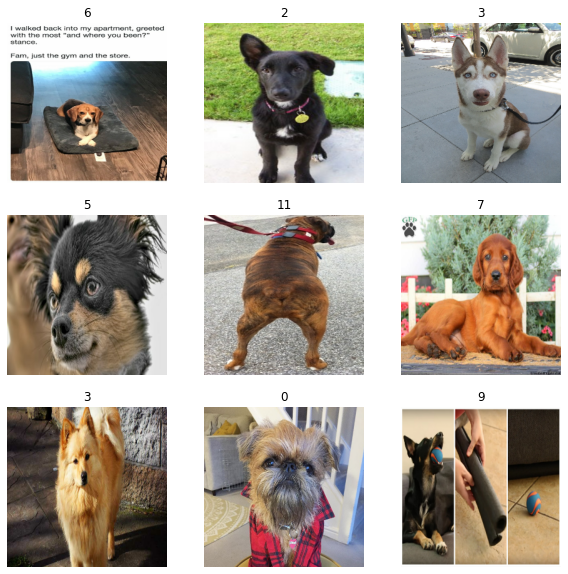

In [4]:
# Vsualizing the dataset

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in training_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [5]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE)
num_classes = len(training_dataset.class_names)
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)


model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.05),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)

])

model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [6]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = "./model.h5",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
  )


training_dataset.shuffle(50)
epochs=30

training_log = model.fit(
  training_dataset,
  validation_data=validation_dataset,
  epochs=epochs,
  batch_size = 120,
  callbacks =[model_checkpoint_callback]
)



Epoch 1/30
17/17 [==============================] - 8s 430ms/step - loss: 4.7313 - accuracy: 0.0669 - val_loss: 2.6553 - val_accuracy: 0.0632
Epoch 2/30
17/17 [==============================] - 7s 414ms/step - loss: 2.6417 - accuracy: 0.0803 - val_loss: 2.6315 - val_accuracy: 0.1264
Epoch 3/30
17/17 [==============================] - 8s 419ms/step - loss: 2.5912 - accuracy: 0.0994 - val_loss: 2.5869 - val_accuracy: 0.1322
Epoch 4/30
17/17 [==============================] - 8s 420ms/step - loss: 2.4283 - accuracy: 0.2046 - val_loss: 2.4512 - val_accuracy: 0.2011
Epoch 5/30
17/17 [==============================] - 8s 426ms/step - loss: 2.0873 - accuracy: 0.3671 - val_loss: 2.2792 - val_accuracy: 0.2586
Epoch 6/30
17/17 [==============================] - 8s 420ms/step - loss: 1.6773 - accuracy: 0.4971 - val_loss: 1.9542 - val_accuracy: 0.5172
Epoch 7/30
17/17 [==============================] - 8s 419ms/step - loss: 1.1794 - accuracy: 0.6577 - val_loss: 1.7719 - val_accuracy: 0.5345
Epoch 

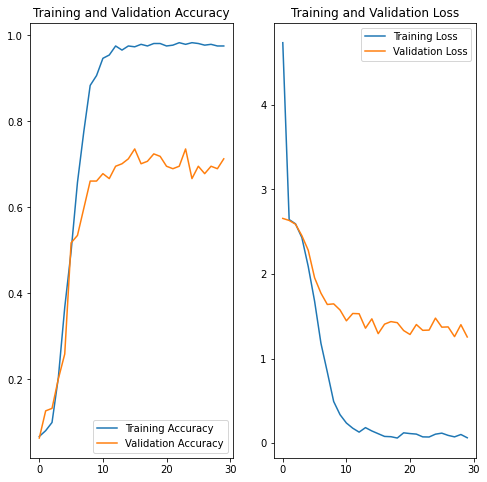

In [11]:

acc = training_log.history['accuracy']
val_acc = training_log.history['val_accuracy']

loss = training_log.history['loss']
val_loss = training_log.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [8]:
tf.config.list_physical_devices('GPU')

[]

In [9]:

sample_class_name = random.choice(os.listdir("./final_labels"))
sample_class_number = random.randrange(len(os.listdir("./final_labels/" + sample_class_name))+1)
sample = sample_class_name + "/" +str(sample_class_number)
img = tf.keras.utils.load_img(path=("./final_labels/"+ sample +".jpg"), target_size=(IMAGE_SIZE, IMAGE_SIZE))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

model.load_weights("model.h5")
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {}, with a {:.2f} percent confidence.\n".format(training_dataset.class_names[np.argmax(score)], 100 * np.max(score)),
    "It was a " + sample.split("/")[0]
)

1/1 [==============================] - 0s 66ms/step
This image most likely belongs to Bichon Frise dog, with a 94.46 percent confidence.
 It was a Bichon Frise dog


## UI Design

For the time being, the UI is very modest - a simple window with two buttons. One is called "open", and opens the local file explorer and allows you to select an image, and the other is "predict", which will use the image you selected to predict the breed of the dog. Once clicked, the text will change to the prediction and confidence, before prompting the user to select another image. In the future, it would be preferable to have a snapchat like-interface on a phone, with verified images used to further train the model.

In [10]:
import tkinter as tk
from tkinter.filedialog import askopenfilename

window = tk.Tk()

def open_file_chooser():
    global filename 
    filename = askopenfilename()
    print("You have selected : %s" % filename)

def predict():
    img = tf.keras.utils.load_img(path=(filename), target_size=(IMAGE_SIZE, IMAGE_SIZE))

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    model.load_weights("model.h5")
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {}, with a {:.2f} percent confidence.\n".format(training_dataset.class_names[np.argmax(score)], 100 * np.max(score)),
        "It was a " + filename
    )

    predict_label.config(text=training_dataset.class_names[np.argmax(score)] + " with confidence: {:.2f}".format(100 * np.max(score)) + "\npredict again?")


window.title("Dog Breed Classifier")
window.geometry("400x200")

open = tk.Button(window, text = "Open", command = open_file_chooser)
open.pack()

predict_label = tk.Button(window, text = "Predict", command = predict)
predict_label.pack()

window.mainloop()

You have selected : C:/dev/Capstone Project/dog-breed-identification/train/00ba244566e36e0af3d979320fd3017f.jpg
1/1 [==============================] - 0s 15ms/step
This image most likely belongs to Affenhuahua dog, with a 31.39 percent confidence.
 It was a C:/dev/Capstone Project/dog-breed-identification/train/00ba244566e36e0af3d979320fd3017f.jpg
You have selected : C:/dev/Capstone Project/final_labels/Bocker dog/47.jpg
1/1 [==============================] - 0s 15ms/step
This image most likely belongs to Bocker dog, with a 98.09 percent confidence.
 It was a C:/dev/Capstone Project/final_labels/Bocker dog/47.jpg


# Database Design

Currently, the database design is mostly one-way: as the model is trained, it writes to a saved .h5 format its model, after which it continues to gather more data via the clients. the training data must be managed using a spaced repetition system as new data is fed in to ensure maximum efficiency of the data used. after which, via updates, the model trained on a web server is sent back to the phones and clients to be re-utilized.

![Alt text](./development%20model.png "a title")

## Non Functional Requirements

The greatest current limitation is the lack of data to train on, resulting in overfitting. However that should be alleviated with more data to work with as the project. additional fine-tuning and data augmentation show that the accuracy improves as well.

before fine tuning:

![Alt text](./overfitting-1.png "before fine tuning")

after fine tuning:

![Alt text](./overfitting-2.png "after fine-tuning")